In [2]:
from fetch_data import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
symbol = "btc" # 要获取的数据的名称
starttime = "2025-03-08T04:00:00"  # 开始时间 注意时差，数据使用utc时间
endtime = "2025-03-08T12:35:00"  # 结束时间

# Get the data
df = get_data(symbol, starttime, endtime)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 5535 entries, 32 to 5566
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Price           5535 non-null   float64       
 1   Quantity        5535 non-null   float64       
 2   TradeTimestamp  5535 non-null   datetime64[ns]
 3   IsBuyerMaker    5535 non-null   bool          
 4   OrderID         5535 non-null   int64         
 5   BatchTimestamp  5535 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(2), int64(1)
memory usage: 264.9 KB
None

First few rows:
      Price  Quantity                TradeTimestamp  IsBuyerMaker     OrderID  \
32  85880.0     0.004 2025-03-08 04:00:01.894999981          True  6073301757   
33  85880.1     0.004 2025-03-08 04:00:01.900000095         False  6073301758   
34  85880.0     0.796 2025-03-08 04:00:01.901000023          True  6073301759   
35  85880.0     0.018 2025-03-08 04:00:0

In [3]:
print(df.head())

      Price  Quantity                TradeTimestamp  IsBuyerMaker     OrderID  \
32  85880.0     0.004 2025-03-08 04:00:01.894999981          True  6073301757   
33  85880.1     0.004 2025-03-08 04:00:01.900000095         False  6073301758   
34  85880.0     0.796 2025-03-08 04:00:01.901000023          True  6073301759   
35  85880.0     0.018 2025-03-08 04:00:01.901000023          True  6073301760   
36  85880.1     0.010 2025-03-08 04:00:01.907999992         False  6073301761   

               BatchTimestamp  
32 2025-03-08 04:00:55.303466  
33 2025-03-08 04:00:55.303466  
34 2025-03-08 04:00:55.303466  
35 2025-03-08 04:00:55.303466  
36 2025-03-08 04:00:55.303466  


In [21]:
# 价格走势图ohlc 和交易量
df.index = pd.to_datetime(df.TradeTimestamp)
df['Price'] = df['Price'].replace(0, method='ffill')
ohlc = df['Price'].resample('1Min').ohlc()
ohlc = ohlc.dropna()
# ffill zero value

ohlc['volume'] = df['Quantity'].resample('1Min').sum()
ohlc['Date'] = ohlc.index.map(mdates.date2num)
ohlc_data = ohlc[['Date', 'open', 'high', 'low', 'close']].values


C:\Users\73193\AppData\Local\Temp\ipykernel_83704\2189910708.py:3: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['Price'] = df['Price'].replace(0, method='ffill')


In [22]:
print(ohlc)

                        open     high      low    close  volume          Date
TradeTimestamp                                                               
2025-03-08 04:00:00  85880.0  85882.6  85842.0  85844.7  61.971  20155.166667
2025-03-08 04:01:00  85844.7  85844.7  85764.2  85764.2  69.072  20155.167361
2025-03-08 04:02:00  85764.2  85767.9  85708.2  85714.5  83.323  20155.168056


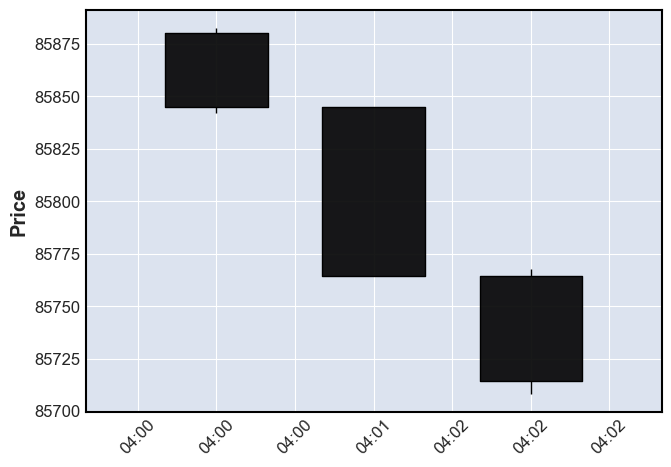

In [28]:
import mplfinance as mpf
    # Create the plot
mpf.plot(ohlc,type='candle')


